## **Analysis of Go Data Vehicle Data**

**This project uses recent vehicle listing data from Go Auto to build a machine learning model that classifies vehicles as automatic or manual based on features like year, make, model, mileage, and price. It combines data analysis, preprocessing, and Power BI visualizations to improve inventory management and support targeted marketing strategies**

In [ ]:
# import necessary python libraries to visualize and manipulate the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#import data file into a pandas dataframe
df_goData = pd.read_csv('CBB_Listings.csv', on_bad_lines='skip')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


**1. Exploring CBB_Listing Dataset.**

In [ ]:
# display the first 5 rows
df_goData.head()

,listing_id,listing_heading,listing_type,listing_url,listing_first_date,days_on_market,dealer_id,dealer_name,dealer_street,dealer_city,dealer_province,dealer_postal_code,dealer_url,dealer_email,dealer_phone,dealer_type,stock_type,vehicle_id,vin,uvc,mileage,price,msrp,model_year,make,model,series,style,certified,has_leather,has_navigation,exterior_color,exterior_color_category,interior_color,interior_color_category,price_analysis,wheelbase_from_vin,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,number_price_changes,price_history_delimited,distance_to_dealer,location_score,listing_dropoff_date
0,f5b663d2-4896-11ef-a15b-8b4423f1ff08,1987 IROC Z 350 Auto T-Tops,Active,https://www.kijiji.ca/v-cars-trucks/edmonton/1...,7/22/2024 0:00,9,11152931,David T's Camaro & Firebird Auto Center,10611 201 St NW,Edmonton,AB,T5S 1Y8,kijiji.ca,NaN,780-454-3330,I,USED,79126,1G1FP2189HN139203,1987160041,230860,11500,0,1987,Chevrolet,Camaro,Iroc Z28,2D Coupe,0,0,0,Blue,blue,NaN,NaN,0,0.0,RWD,5.7L V8 TBI,A,Gas,0,"2024-07-22,11500,230860",9.84,5,NaN
1,a9f565e6-4712-11ef-a23f-79dc25c5e601,NaN,Sold,https://www.redlinemotors.ca/vehicle-details/1...,7/20/2024 0:00,4,11131329,Redlinemotors.Ca,14421 Mark Messier Trail,Edmonton,AB,T6V 1H4,redlinemotors.ca,NaN,780-455-5919,I,USED,72277,1C3BF66P0JW113318,1988180016,48905,8700,0,1988,Chrysler,Fifth Avenue,NaN,4D Sedan,0,0,0,NaN,NaN,NaN,NaN,0,0.0,RWD,5.2L V8,A,Gas,0,"2024-07-20,8700,48905",8.30,5,7/24/2024 0:00
2,03d18c58-253a-11ef-8f33-8905b4a2f000,1989 Cadillac DeVille Sedan FWD,Active,https://www.sweetheartmotor.com/cars/used/1989...,6/7/2024 0:00,54,11161704,Gateway Auto & Rv Sales & Financing Ltd,5404 Gateway Blvd NW,Edmonton,AB,T6H 1B7,sweetheartmotor.com,NaN,780-999-0055,I,USED,66755,1G6CD5157K4364083,1989140008,174640,6000,0,1989,Cadillac,DeVille,NaN,4D Sedan,0,0,0,Pink,pink,NaN,NaN,0,0.0,FWD,4.5L V8 DI,A,Gas,0,"2024-06-07,6000,174640",5.71,4,NaN
3,2d12630b-460e-11ee-89c4-e5b3161d4741,1989 Cadillac DeVille Sedan FWD,Active,https://www.sweetheartmotor.com/cars/used/1989...,8/28/2023 0:00,338,11128265,Credit Angels,5404 Gateway Blvd NW,Edmonton,AB,T6H 1B7,sweetheartmotor.com,NaN,780-244-4999,I,USED,66755,1G6CD5157K4364083,1989140008,174640,6000,0,1989,Cadillac,DeVille,NaN,4D Sedan,0,0,0,Pink,pink,NaN,NaN,0,0.0,FWD,4.5L V8 DI,A,Gas,4,"2023-08-28,4500,174640:2023-09-13,5900,174640:...",5.71,5,NaN
4,53a8e550-47cd-11ef-8587-f926ecb61035,1989 Camaro IROC 350 Auto T-Top,Active,https://www.kijiji.ca/v-cars-trucks/edmonton/1...,7/21/2024 0:00,10,11152931,David T's Camaro & Firebird Auto Center,10611 201 St NW,Edmonton,AB,T5S 1Y8,kijiji.ca,NaN,780-454-3330,I,USED,72366,1G1FP2185K2723911,1989160041,288000,8500,0,1989,Chevrolet,Camaro,Z28,2D Coupe,0,0,0,Other,NaN,NaN,NaN,0,0.0,RWD,5.7L V8 TBI,A,Gas,0,"2024-07-21,8500,288000",9.84,5,NaN


In [ ]:
# get general information about the dataset
df_goData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145114 entries, 0 to 145113
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   listing_id               145114 non-null  object 
 1   listing_heading          141099 non-null  object 
 2   listing_type             145114 non-null  object 
 3   listing_url              145114 non-null  object 
 4   listing_first_date       145114 non-null  object 
 5   days_on_market           145114 non-null  int64  
 6   dealer_id                145114 non-null  int64  
 7   dealer_name              145114 non-null  object 
 8   dealer_street            145114 non-null  object 
 9   dealer_city              145114 non-null  object 
 10  dealer_province          145114 non-null  object 
 11  dealer_postal_code       145114 non-null  object 
 12  dealer_url               145114 non-null  object 
 13  dealer_email             0 non-null       float64
 14  deal

**Observations**

---


1. There are 145144 rows and 46 columns
2. 9 columns contain null values:

  listing_heading,
  dealer_email,
  dealer_phone,
  series,
  exterior_color,
  exterior_color_category,
  interior_color,
  interior_color_category,
  listing_dropoff_date

3. The entire column of dealer email has no data


In [ ]:
# get the number of rows and columns in the dataset

df_goData.shape

(145114, 46)

In [ ]:
# checking the data type for each column
df_goData.dtypes

,0
listing_id,object
listing_heading,object
listing_type,object
listing_url,object
listing_first_date,object
days_on_market,int64
dealer_id,int64
dealer_name,object
dealer_street,object
dealer_city,object


In [ ]:
# checking for duplicates

df_goData.duplicated().sum()

0

In [ ]:
# generating correlation matrix
corr_matrix = df_goData.corr(numeric_only = True)
corr_matrix

,days_on_market,dealer_id,dealer_email,vehicle_id,uvc,mileage,price,msrp,model_year,certified,has_leather,has_navigation,price_analysis,wheelbase_from_vin,number_price_changes,distance_to_dealer,location_score
days_on_market,1.000000,-0.333040,NaN,0.088519,0.090708,-0.099379,0.032593,0.086472,0.087565,0.010102,NaN,NaN,-0.032297,0.063354,0.538087,0.002857,-0.012545
dealer_id,-0.333040,1.000000,NaN,0.122341,0.126313,-0.111027,0.028824,0.091762,0.125910,-0.028688,NaN,NaN,-0.022672,0.024594,-0.206535,-0.172095,0.362848
dealer_email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_id,0.088519,0.122341,NaN,1.000000,0.989795,-0.836987,0.168651,0.302331,0.991484,-0.001840,NaN,NaN,-0.037789,0.325177,0.048871,-0.016805,0.042740
uvc,0.090708,0.126313,NaN,0.989795,1.000000,-0.838701,0.167236,0.291577,0.997559,-0.005003,NaN,NaN,-0.035352,0.329674,0.048869,-0.018901,0.052624
mileage,-0.099379,-0.111027,NaN,-0.836987,-0.838701,1.000000,-0.170670,-0.296667,-0.840544,0.005244,NaN,NaN,0.042196,-0.189135,-0.040636,0.028584,-0.056761
price,0.032593,0.028824,NaN,0.168651,0.167236,-0.170670,1.000000,0.263490,0.170740,-0.002013,NaN,NaN,-0.031829,0.152728,0.015601,-0.006875,0.015640
msrp,0.086472,0.091762,NaN,0.302331,0.291577,-0.296667,0.263490,1.000000,0.304345,0.003305,NaN,NaN,-0.064157,0.504725,0.034052,-0.005914,0.048783
model_year,0.087565,0.125910,NaN,0.991484,0.997559,-0.840544,0.170740,0.304345,1.000000,-0.005212,NaN,NaN,-0.041577,0.336500,0.046920,-0.017271,0.048471
certified,0.010102,-0.028688,NaN,-0.001840,-0.005003,0.005244,-0.002013,0.003305,-0.005212,1.000000,NaN,NaN,-0.012171,-0.013565,0.013000,0.000651,0.059089


Text(0.5, 1.0, 'Correlation Heatmap')

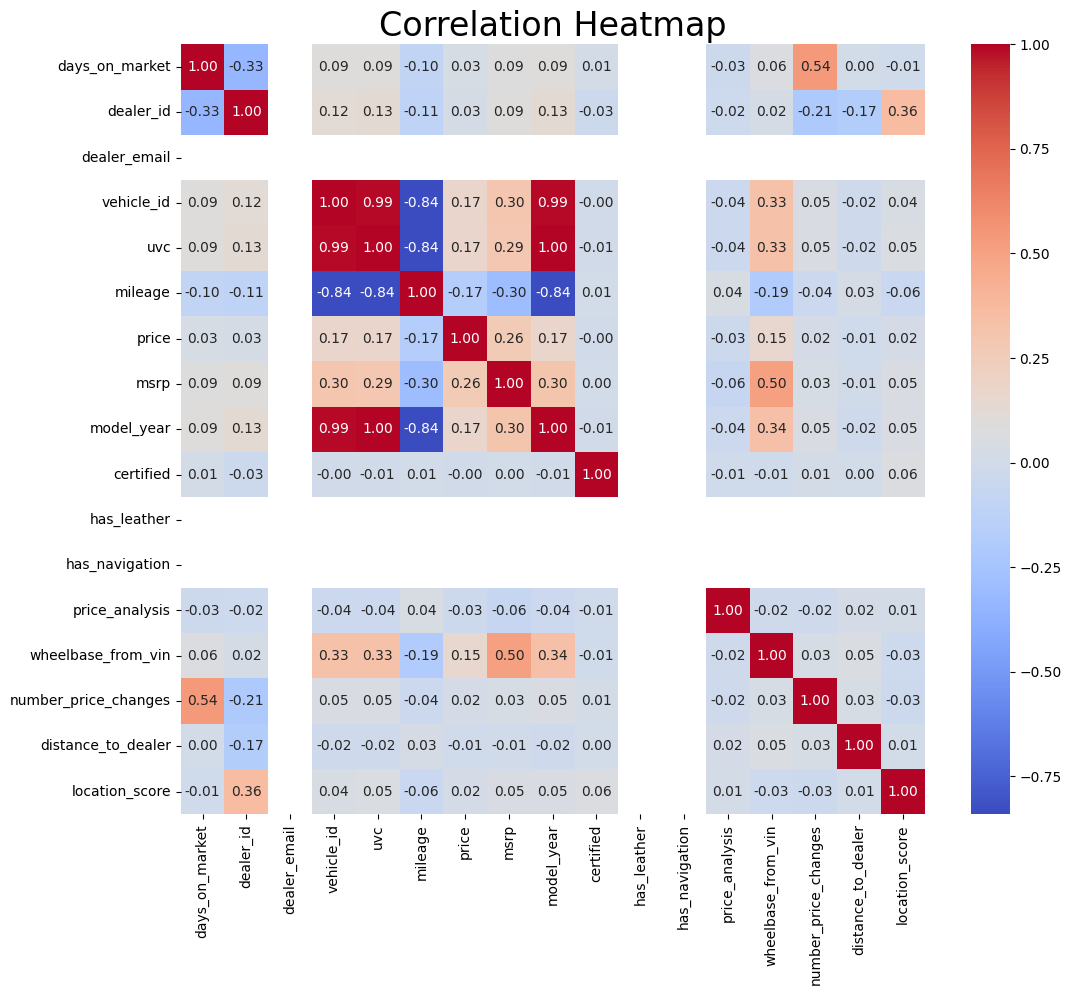

In [ ]:
# Creating a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= ".2f")
plt.title('Correlation Heatmap', size = 24)


### **2a. Data cleaning: Removing null values**

In [ ]:
# enabling copy on write to avoid creating unnecessary copies
pd.options.mode.copy_on_write = True

In [ ]:
# filling null values in series with unknown
df_goData.fillna('unknown', inplace=True)

<ipython-input-17-d2daae218d38>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_goData.fillna('unknown', inplace=True)


In [ ]:
# confirming there are no cells containing null in the dataframe
df_goData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145114 entries, 0 to 145113
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   listing_id               145114 non-null  object 
 1   listing_heading          145114 non-null  object 
 2   listing_type             145114 non-null  object 
 3   listing_url              145114 non-null  object 
 4   listing_first_date       145114 non-null  object 
 5   days_on_market           145114 non-null  int64  
 6   dealer_id                145114 non-null  int64  
 7   dealer_name              145114 non-null  object 
 8   dealer_street            145114 non-null  object 
 9   dealer_city              145114 non-null  object 
 10  dealer_province          145114 non-null  object 
 11  dealer_postal_code       145114 non-null  object 
 12  dealer_url               145114 non-null  object 
 13  dealer_email             145114 non-null  object 
 14  deal

### **2b. Data cleaning: Removing Duplicates**

In [ ]:
# checking for duplicate rows
duplicate_rows = df_goData.duplicated()
duplicate_rows

In [ ]:
duplicate_rows.nunique()

1

**Since there is only 1 unique entry in duplicate rows, it means that there are no duplicates**

In [ ]:
df_goData.shape

(145114, 46)

### **2c. Data cleaning: Removing Outliers**

**Removing outliers from price coulum**

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_goData['price'].quantile(0.25)
Q3 = df_goData['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df_goData[(df_goData['price'] >= lower_bound) & (df_goData['price'] <= upper_bound)]

#print("Original Data:")
#print(df_clean)
#print("\nData without outliers:")
#print(df_no_outliers)


In [ ]:
df_no_outliers.shape

(141882, 46)

**Removing outliers from mileage column**

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_goData['mileage'].quantile(0.25)
Q3 = df_goData['mileage'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df_goData[(df_goData['mileage'] >= lower_bound) & (df_goData['mileage'] <= upper_bound)]

In [ ]:
df_no_outliers.shape

(141048, 46)

In [ ]:
df_no_outliers.reset_index(drop=True, inplace=True)

## **2d. Data cleaning: Assigning 6 and 7 in transmission_from_vin column to manual and automatic respectively**

In [ ]:
# checking the unique entries for transmission_from_vin column
df_no_outliers['transmission_from_vin'].unique()

array(['A', 'M', '6', '7'], dtype=object)

In [ ]:
df_no_outliers.replace({'transmission_from_vin': '6'}, 'M', inplace=True)
df_no_outliers.replace({'transmission_from_vin': '7'}, 'A', inplace=True)

In [ ]:
# checking the unique entries for transmission_from_vin column after replacing 6 and 7
df_no_outliers['transmission_from_vin'].unique()

array(['A', 'M'], dtype=object)

### **3. Identifying Significant Attributes for Problem 3.**

---



Based on our research into car features, we identified 18 features that has a high potential to make accurate predictions on vehicle transmission type. Following this selction, we are using Chi-square technique to identify features (from these 18) that would best make good predictions, there by reducing the number of features from 18 initially selected.

In [ ]:
# creating a new dataframe containing relevant features
df_features = df_no_outliers[['model_year', 'make', 'model', 'mileage', 'price', 'series', 'style', 'dealer_type', 'stock_type', 'days_on_market', 'certified', 'vin',
                         'drivetrain_from_vin', 'engine_from_vin', 'wheelbase_from_vin','fuel_type_from_vin', 'number_price_changes','transmission_from_vin']]

In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141048 entries, 0 to 141047
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   model_year             141048 non-null  int64  
 1   make                   141048 non-null  object 
 2   model                  141048 non-null  object 
 3   mileage                141048 non-null  int64  
 4   price                  141048 non-null  int64  
 5   series                 141048 non-null  object 
 6   style                  141048 non-null  object 
 7   dealer_type            141048 non-null  object 
 8   stock_type             141048 non-null  object 
 9   days_on_market         141048 non-null  int64  
 10  certified              141048 non-null  int64  
 11  vin                    141048 non-null  object 
 12  drivetrain_from_vin    141048 non-null  object 
 13  engine_from_vin        141048 non-null  object 
 14  wheelbase_from_vin     141048 non-nu

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Import OrdinalEncoder

X = df_features.drop('transmission_from_vin', axis=1)  # Features
y = df_features['transmission_from_vin']  # Target

# Convert categorical features to numerical using OrdinalEncoder
encoder = OrdinalEncoder() # Initialize OrdinalEncoder
X_encoded = encoder.fit_transform(X) # Fit and transform X

# Chi-squared test
chi_scores = chi2(X_encoded, y) # Use encoded X for chi2 test
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=True, inplace=True)
print(p_values)  # Features with lower p-values are more important

make                     0.000000e+00
mileage                  0.000000e+00
price                    0.000000e+00
series                   0.000000e+00
style                    0.000000e+00
wheelbase_from_vin       0.000000e+00
engine_from_vin          0.000000e+00
days_on_market           0.000000e+00
drivetrain_from_vin      0.000000e+00
vin                      0.000000e+00
model_year              9.764850e-228
model                   4.457586e-156
number_price_changes     6.993083e-90
stock_type               8.573350e-90
dealer_type              3.116516e-09
fuel_type_from_vin       4.889714e-02
certified                5.175331e-01
dtype: float64


From the result of Chi-Square test, **model_year, model, number_price_changes, stock_type, dealer_type, fuel_type_from_vin, and certified** have the lowest p-values and are the most useful in making accurate predictions. In addition to these 7, we will include **make, mileage and price** which we have been instructed to include as features in our model.

In [ ]:
# creating a new dataframe containing relevant 11 features
df_model_features = df_features[['model_year', 'make', 'model', 'mileage', 'price', 'number_price_changes',
                              'stock_type', 'dealer_type', 'fuel_type_from_vin', 'certified', 'transmission_from_vin']]

# displaying the new dataframe
df_model_features.head()

,model_year,make,model,mileage,price,number_price_changes,stock_type,dealer_type,fuel_type_from_vin,certified,transmission_from_vin
0,1988,Chrysler,Fifth Avenue,48905,8700,0,USED,I,Gas,0,A
1,1989,Cadillac,DeVille,174640,6000,0,USED,I,Gas,0,A
2,1989,Cadillac,DeVille,174640,6000,4,USED,I,Gas,0,A
3,1989,Volkswagen,Cabriolet,198839,39900,13,USED,F,Gas,0,A
4,1990,Dodge,Ram 150,21364,29900,1,USED,F,Gas,0,A


In [ ]:
df_model_features.shape

(141048, 11)

In [ ]:
df_model_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141048 entries, 0 to 141047
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   model_year             141048 non-null  int64 
 1   make                   141048 non-null  object
 2   model                  141048 non-null  object
 3   mileage                141048 non-null  int64 
 4   price                  141048 non-null  int64 
 5   number_price_changes   141048 non-null  int64 
 6   stock_type             141048 non-null  object
 7   dealer_type            141048 non-null  object
 8   fuel_type_from_vin     141048 non-null  object
 9   certified              141048 non-null  int64 
 10  transmission_from_vin  141048 non-null  object
dtypes: int64(5), object(6)
memory usage: 11.8+ MB


###**4. Splitting data into Train and Test sets.**

In [ ]:
#importing train_test_split library
from sklearn.model_selection import train_test_split

In [ ]:
# defining the independent (X) and dependent (y) variables
X = df_model_features.drop('transmission_from_vin', axis=1)
y = df_model_features['transmission_from_vin']

In [ ]:
# splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, stratify=y, random_state = 42)

In [ ]:
# validating the shape of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((91681, 10), (49367, 10), (91681,), (49367,))

In [ ]:
X_train.head()

,model_year,make,model,mileage,price,number_price_changes,stock_type,dealer_type,fuel_type_from_vin,certified
66205,2023,Ford,F150,144,76400,1,NEW,I,Gas,0
18647,2018,GMC,Canyon,106580,35324,8,USED,F,Gas,0
139981,2024,Volkswagen,Tiguan,11,47270,7,NEW,I,Gas,0
138880,2024,Volkswagen,Jetta,10,38770,2,NEW,F,Gas,0
25779,2019,GMC,Terrain,72310,32999,4,USED,F,Gas,0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91681 entries, 66205 to 16852
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   model_year            91681 non-null  int64 
 1   make                  91681 non-null  object
 2   model                 91681 non-null  object
 3   mileage               91681 non-null  int64 
 4   price                 91681 non-null  int64 
 5   number_price_changes  91681 non-null  int64 
 6   stock_type            91681 non-null  object
 7   dealer_type           91681 non-null  object
 8   fuel_type_from_vin    91681 non-null  object
 9   certified             91681 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 7.7+ MB


In [ ]:
X_test.head()

,model_year,make,model,mileage,price,number_price_changes,stock_type,dealer_type,fuel_type_from_vin,certified
18226,2018,Ford,F150,91000,33988,0,USED,I,Gas,0
11595,2017,Chevrolet,Malibu,72000,20209,3,USED,I,Hybrid,0
83699,2024,Chevrolet,Corvette,6,106121,0,NEW,I,Gas,0
70067,2023,Jeep,Grand Cherokee,49086,58999,2,USED,I,Gas,0
36241,2020,Kia,Sorento,87728,29995,1,USED,F,Gas,0


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49367 entries, 18226 to 122399
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   model_year            49367 non-null  int64 
 1   make                  49367 non-null  object
 2   model                 49367 non-null  object
 3   mileage               49367 non-null  int64 
 4   price                 49367 non-null  int64 
 5   number_price_changes  49367 non-null  int64 
 6   stock_type            49367 non-null  object
 7   dealer_type           49367 non-null  object
 8   fuel_type_from_vin    49367 non-null  object
 9   certified             49367 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 4.1+ MB


In [ ]:
y_train.head()

,transmission_from_vin
66205,A
18647,A
139981,A
138880,A
25779,A


In [ ]:
y_test.head()

,transmission_from_vin
18226,A
11595,A
83699,A
70067,A
36241,A


### **5. Data Pre-processing - Encoding Categorical columns**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
from category_encoders import BinaryEncoder

###**Encoding X_train**
**i) Encoding the 'make' column**

In [ ]:
# checking the unique entries in 'make' column
X_train['make'].unique()


array(['Ford', 'GMC', 'Volkswagen', 'Cadillac', 'BMW', 'Chevrolet', 'Ram',
       'Mazda', 'Jeep', 'Audi', 'Honda', 'Mercedes-Benz', 'Lexus', 'Kia',
       'Pontiac', 'Chrysler', 'Nissan', 'Hyundai', 'Toyota', 'Infiniti',
       'Buick', 'Dodge', 'Mini', 'Subaru', 'Acura', 'Volvo', 'Mitsubishi',
       'Lincoln', 'Land Rover', 'Maserati', 'Genesis', 'Alfa Romeo',
       'Fiat', 'Porsche', 'Jaguar', 'Tesla', 'Rivian', 'Suzuki', 'Smart',
       'Scion', 'Mercury', 'Polestar', 'Hummer', 'Saturn', 'Fisker'],
      dtype=object)

In [ ]:
# checking the count of unique entries in 'make' column
X_train['make'].nunique()

45

In [ ]:
# Encoding the 'make' column with BinaryEncoder
be_make = BinaryEncoder(cols = ['make'])
X_train = be_make.fit_transform(X_train)


In [ ]:
# confirming the 'make' column has been encoded
X_train.head()

,model_year,make_0,make_1,make_2,make_3,make_4,make_5,model,mileage,price,number_price_changes,stock_type,dealer_type,fuel_type_from_vin,certified
66205,2023,0,0,0,0,0,1,F150,144,76400,1,NEW,I,Gas,0
18647,2018,0,0,0,0,1,0,Canyon,106580,35324,8,USED,F,Gas,0
139981,2024,0,0,0,0,1,1,Tiguan,11,47270,7,NEW,I,Gas,0
138880,2024,0,0,0,0,1,1,Jetta,10,38770,2,NEW,F,Gas,0
25779,2019,0,0,0,0,1,0,Terrain,72310,32999,4,USED,F,Gas,0


**ii)Encoding the 'model' column**

In [ ]:
# checking the unique entries in 'model' column
X_train['model'].unique()


In [ ]:
X_train['model'].nunique()

655

In [ ]:
# Encoding the 'model' column with BinaryEncoder
be_model = BinaryEncoder(cols = ['model'])
X_train = be_model.fit_transform(X_train)


In [ ]:
X_train.head()

,model_year,make_0,make_1,make_2,make_3,make_4,make_5,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,mileage,price,number_price_changes,stock_type,dealer_type,fuel_type_from_vin,certified
66205,2023,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,144,76400,1,NEW,I,Gas,0
18647,2018,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,106580,35324,8,USED,F,Gas,0
139981,2024,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,11,47270,7,NEW,I,Gas,0
138880,2024,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,10,38770,2,NEW,F,Gas,0
25779,2019,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,72310,32999,4,USED,F,Gas,0


In [ ]:
X_train.shape

(91681, 24)

**iii) Encoding the 'stock_type' column**

In [ ]:
# checking the unique entries in the 'stock_type' column
X_train['stock_type'].unique()

array(['NEW', 'USED'], dtype=object)

In [ ]:
# Encoding the stock_type column with LabelEncoder

le_number_stock_type = LabelEncoder()
X_train['stock_type'] = le_number_stock_type.fit_transform(X_train['stock_type'])


In [ ]:
#checking 'exterior_color_category' column has been encoded and the 1631 unique entries have been captured in 11 columns
X_train.head()

,model_year,make_0,make_1,make_2,make_3,make_4,make_5,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,mileage,price,number_price_changes,stock_type,dealer_type,fuel_type_from_vin,certified
66205,2023,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,144,76400,1,0,I,Gas,0
18647,2018,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,106580,35324,8,1,F,Gas,0
139981,2024,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,11,47270,7,0,I,Gas,0
138880,2024,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,10,38770,2,0,F,Gas,0
25779,2019,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,72310,32999,4,1,F,Gas,0


**vii) Encoding the 'dealer_type' column**

In [ ]:
# checking the unique entries in the 'dealer_type' column
X_train['dealer_type'].unique()

array(['I', 'F'], dtype=object)

In [ ]:
# Encoding the dealer_type column with LabelEncoder

le_dealer_type = LabelEncoder()
X_train['dealer_type'] = le_dealer_type.fit_transform(X_train['dealer_type'])


In [ ]:
X_train.head()

,model_year,make_0,make_1,make_2,make_3,make_4,make_5,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,mileage,price,number_price_changes,stock_type,dealer_type,fuel_type_from_vin,certified
66205,2023,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,144,76400,1,0,1,Gas,0
18647,2018,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,106580,35324,8,1,0,Gas,0
139981,2024,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,11,47270,7,0,1,Gas,0
138880,2024,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,10,38770,2,0,0,Gas,0
25779,2019,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,72310,32999,4,1,0,Gas,0


**viii) Encoding the 'fuel_type_from_vin' column**

In [ ]:
# checking the unique entries in the 'fuel_type_from_vin' column
X_train['fuel_type_from_vin'].unique()

array(['Gas', 'Hybrid', 'Electric', 'Diesel', 'PHEV', 'CNG', 'Hydrogen'],
      dtype=object)

In [ ]:
X_test['fuel_type_from_vin'].unique()

array(['Gas', 'Hybrid', 'Electric', 'Diesel', 'PHEV', 'Hydrogen', 'CNG'],
      dtype=object)

In [ ]:
# Encoding the fuel_type_from_vin column with OnehotEncoder
X_train = pd.get_dummies(X_train, columns=['fuel_type_from_vin'], dtype = 'int')

In [ ]:
X_train.head()

,model_year,make_0,make_1,make_2,make_3,make_4,make_5,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,mileage,price,number_price_changes,stock_type,dealer_type,certified,fuel_type_from_vin_CNG,fuel_type_from_vin_Diesel,fuel_type_from_vin_Electric,fuel_type_from_vin_Gas,fuel_type_from_vin_Hybrid,fuel_type_from_vin_Hydrogen,fuel_type_from_vin_PHEV
66205,2023,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,144,76400,1,0,1,0,0,0,0,1,0,0,0
18647,2018,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,106580,35324,8,1,0,0,0,0,0,1,0,0,0
139981,2024,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,11,47270,7,0,1,0,0,0,0,1,0,0,0
138880,2024,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,10,38770,2,0,0,0,0,0,0,1,0,0,0
25779,2019,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,72310,32999,4,1,0,0,0,0,0,1,0,0,0


In [ ]:
X_train.shape

(91681, 30)

### **Encoding X_test**

In [ ]:
# checking the unique entries in 'make' column
X_test['make'].unique()

array(['Ford', 'Chevrolet', 'Jeep', 'Kia', 'Nissan', 'BMW', 'GMC',
       'Hyundai', 'Ram', 'Dodge', 'Audi', 'Acura', 'Honda', 'Volkswagen',
       'Mitsubishi', 'Lexus', 'Toyota', 'Subaru', 'Lincoln', 'Cadillac',
       'Buick', 'Mazda', 'Mini', 'Fiat', 'Jaguar', 'Mercedes-Benz',
       'Infiniti', 'Land Rover', 'Volvo', 'Chrysler', 'Alfa Romeo',
       'Smart', 'Maserati', 'Tesla', 'Porsche', 'Genesis', 'Rivian',
       'Pontiac', 'Suzuki', 'Scion', 'Saturn', 'Hummer'], dtype=object)

In [ ]:
X_test['make'].nunique()

42

In [ ]:
# Encoding the 'make' column with BinaryEncoder
be_make = BinaryEncoder(cols = ['make'])
X_test = be_make.fit_transform(X_test)

In [ ]:
# Encoding the 'model' column with BinaryEncoder
be_model = BinaryEncoder(cols = ['model'])
X_test = be_model.fit_transform(X_test)

In [ ]:
# Encoding the stock_type column with LabelEncoder

le_number_stock_type = LabelEncoder()
X_test['stock_type'] = le_number_stock_type.fit_transform(X_test['stock_type'])

In [ ]:
# Encoding the dealer_type column with LabelEncoder

le_number_dealer_type = LabelEncoder()
X_test['dealer_type'] = le_number_dealer_type.fit_transform(X_test['dealer_type'])


In [ ]:
# Encoding the fuel_type_from_vin column with OnehotEncoder
X_test = pd.get_dummies(X_test, columns=['fuel_type_from_vin'], dtype = 'int')

In [ ]:
X_test.head()

,model_year,make_0,make_1,make_2,make_3,make_4,make_5,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,mileage,price,number_price_changes,stock_type,dealer_type,certified,fuel_type_from_vin_CNG,fuel_type_from_vin_Diesel,fuel_type_from_vin_Electric,fuel_type_from_vin_Gas,fuel_type_from_vin_Hybrid,fuel_type_from_vin_Hydrogen,fuel_type_from_vin_PHEV
18226,2018,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,91000,33988,0,1,1,0,0,0,0,1,0,0,0
11595,2017,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,72000,20209,3,1,1,0,0,0,0,0,1,0,0
83699,2024,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,6,106121,0,0,1,0,0,0,0,1,0,0,0
70067,2023,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,49086,58999,2,1,1,0,0,0,0,1,0,0,0
36241,2020,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,87728,29995,1,1,0,0,0,0,0,1,0,0,0


In [ ]:
print(X_train.shape)
print(X_test.shape)

(91681, 30)
(49367, 30)


### **Encoding y_train & y_test**

In [ ]:
y_train = pd.get_dummies(y_train, columns=['transmission_from_vin'], dtype = 'int', drop_first= True)
y_train.head()

,M
66205,0
18647,0
139981,0
138880,0
25779,0


In [ ]:
y_test = pd.get_dummies(y_test, columns=['y_test'], dtype = 'int', drop_first= True)
y_test.head()

,M
18226,0
11595,0
83699,0
70067,0
36241,0


In [ ]:
# rename M to transmission_from_vin in y_train and y_test
y_train.rename(columns={'M': 'transmission_from_vin'}, inplace=True)
y_test.rename(columns={'M': 'transmission_from_vin'}, inplace=True)

In [ ]:
print(y_train.info())
print(y_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 91681 entries, 66205 to 16852
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   transmission_from_vin  91681 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 49367 entries, 18226 to 122399
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   transmission_from_vin  49367 non-null  int64
dtypes: int64(1)
memory usage: 771.4 KB
None


In [ ]:
print(y_train.head())
print(y_test.head())

        transmission_from_vin
66205                       0
18647                       0
139981                      0
138880                      0
25779                       0
       transmission_from_vin
18226                      0
11595                      0
83699                      0
70067                      0
36241                      0


### **6. Handling Imbalanced data columns**

In [ ]:
#count the number of classes in each imbalanced column in the Train set
print(X_train['model_0'].value_counts())
print(X_train['model_1'].value_counts())
print(X_train['certified'].value_counts())
print(X_train['fuel_type_from_vin_CNG'].value_counts())
print(X_train['fuel_type_from_vin_Diesel'].value_counts())
print(X_train['fuel_type_from_vin_Electric'].value_counts())
print(X_train['fuel_type_from_vin_Hybrid'].value_counts())
print(X_train['fuel_type_from_vin_Hydrogen'].value_counts())
print(X_train['fuel_type_from_vin_PHEV'].value_counts())
print(y_train['transmission_from_vin'].value_counts())


model_0
0    91319
1      362
Name: count, dtype: int64
model_1
0    85428
1     6253
Name: count, dtype: int64
certified
0    91034
1      647
Name: count, dtype: int64
fuel_type_from_vin_CNG
0    91679
1        2
Name: count, dtype: int64
fuel_type_from_vin_Diesel
0    86362
1     5319
Name: count, dtype: int64
fuel_type_from_vin_Electric
0    88444
1     3237
Name: count, dtype: int64
fuel_type_from_vin_Hybrid
0    88784
1     2897
Name: count, dtype: int64
fuel_type_from_vin_Hydrogen
0    91680
1        1
Name: count, dtype: int64
fuel_type_from_vin_PHEV
0    89780
1     1901
Name: count, dtype: int64
transmission_from_vin
0    89266
1     2415
Name: count, dtype: int64


In [ ]:
#count the number of classes in each imbalanced column in the Test set
print(X_test['model_0'].value_counts())
print(X_test['model_1'].value_counts())
print(X_test['certified'].value_counts())
print(X_test['fuel_type_from_vin_CNG'].value_counts())
print(X_test['fuel_type_from_vin_Diesel'].value_counts())
print(X_test['fuel_type_from_vin_Electric'].value_counts())
print(X_test['fuel_type_from_vin_Hybrid'].value_counts())
print(X_test['fuel_type_from_vin_Hydrogen'].value_counts())
print(X_test['fuel_type_from_vin_PHEV'].value_counts())
print(y_test['transmission_from_vin'].value_counts())

model_0
0    49234
1      133
Name: count, dtype: int64
model_1
0    45562
1     3805
Name: count, dtype: int64
certified
0    49057
1      310
Name: count, dtype: int64
fuel_type_from_vin_CNG
0    49366
1        1
Name: count, dtype: int64
fuel_type_from_vin_Diesel
0    46514
1     2853
Name: count, dtype: int64
fuel_type_from_vin_Electric
0    47585
1     1782
Name: count, dtype: int64
fuel_type_from_vin_Hybrid
0    47848
1     1519
Name: count, dtype: int64
fuel_type_from_vin_Hydrogen
0    49365
1        2
Name: count, dtype: int64
fuel_type_from_vin_PHEV
0    48291
1     1076
Name: count, dtype: int64
transmission_from_vin
0    48067
1     1300
Name: count, dtype: int64


**Visualization of Imbalanced columns in the Train set**

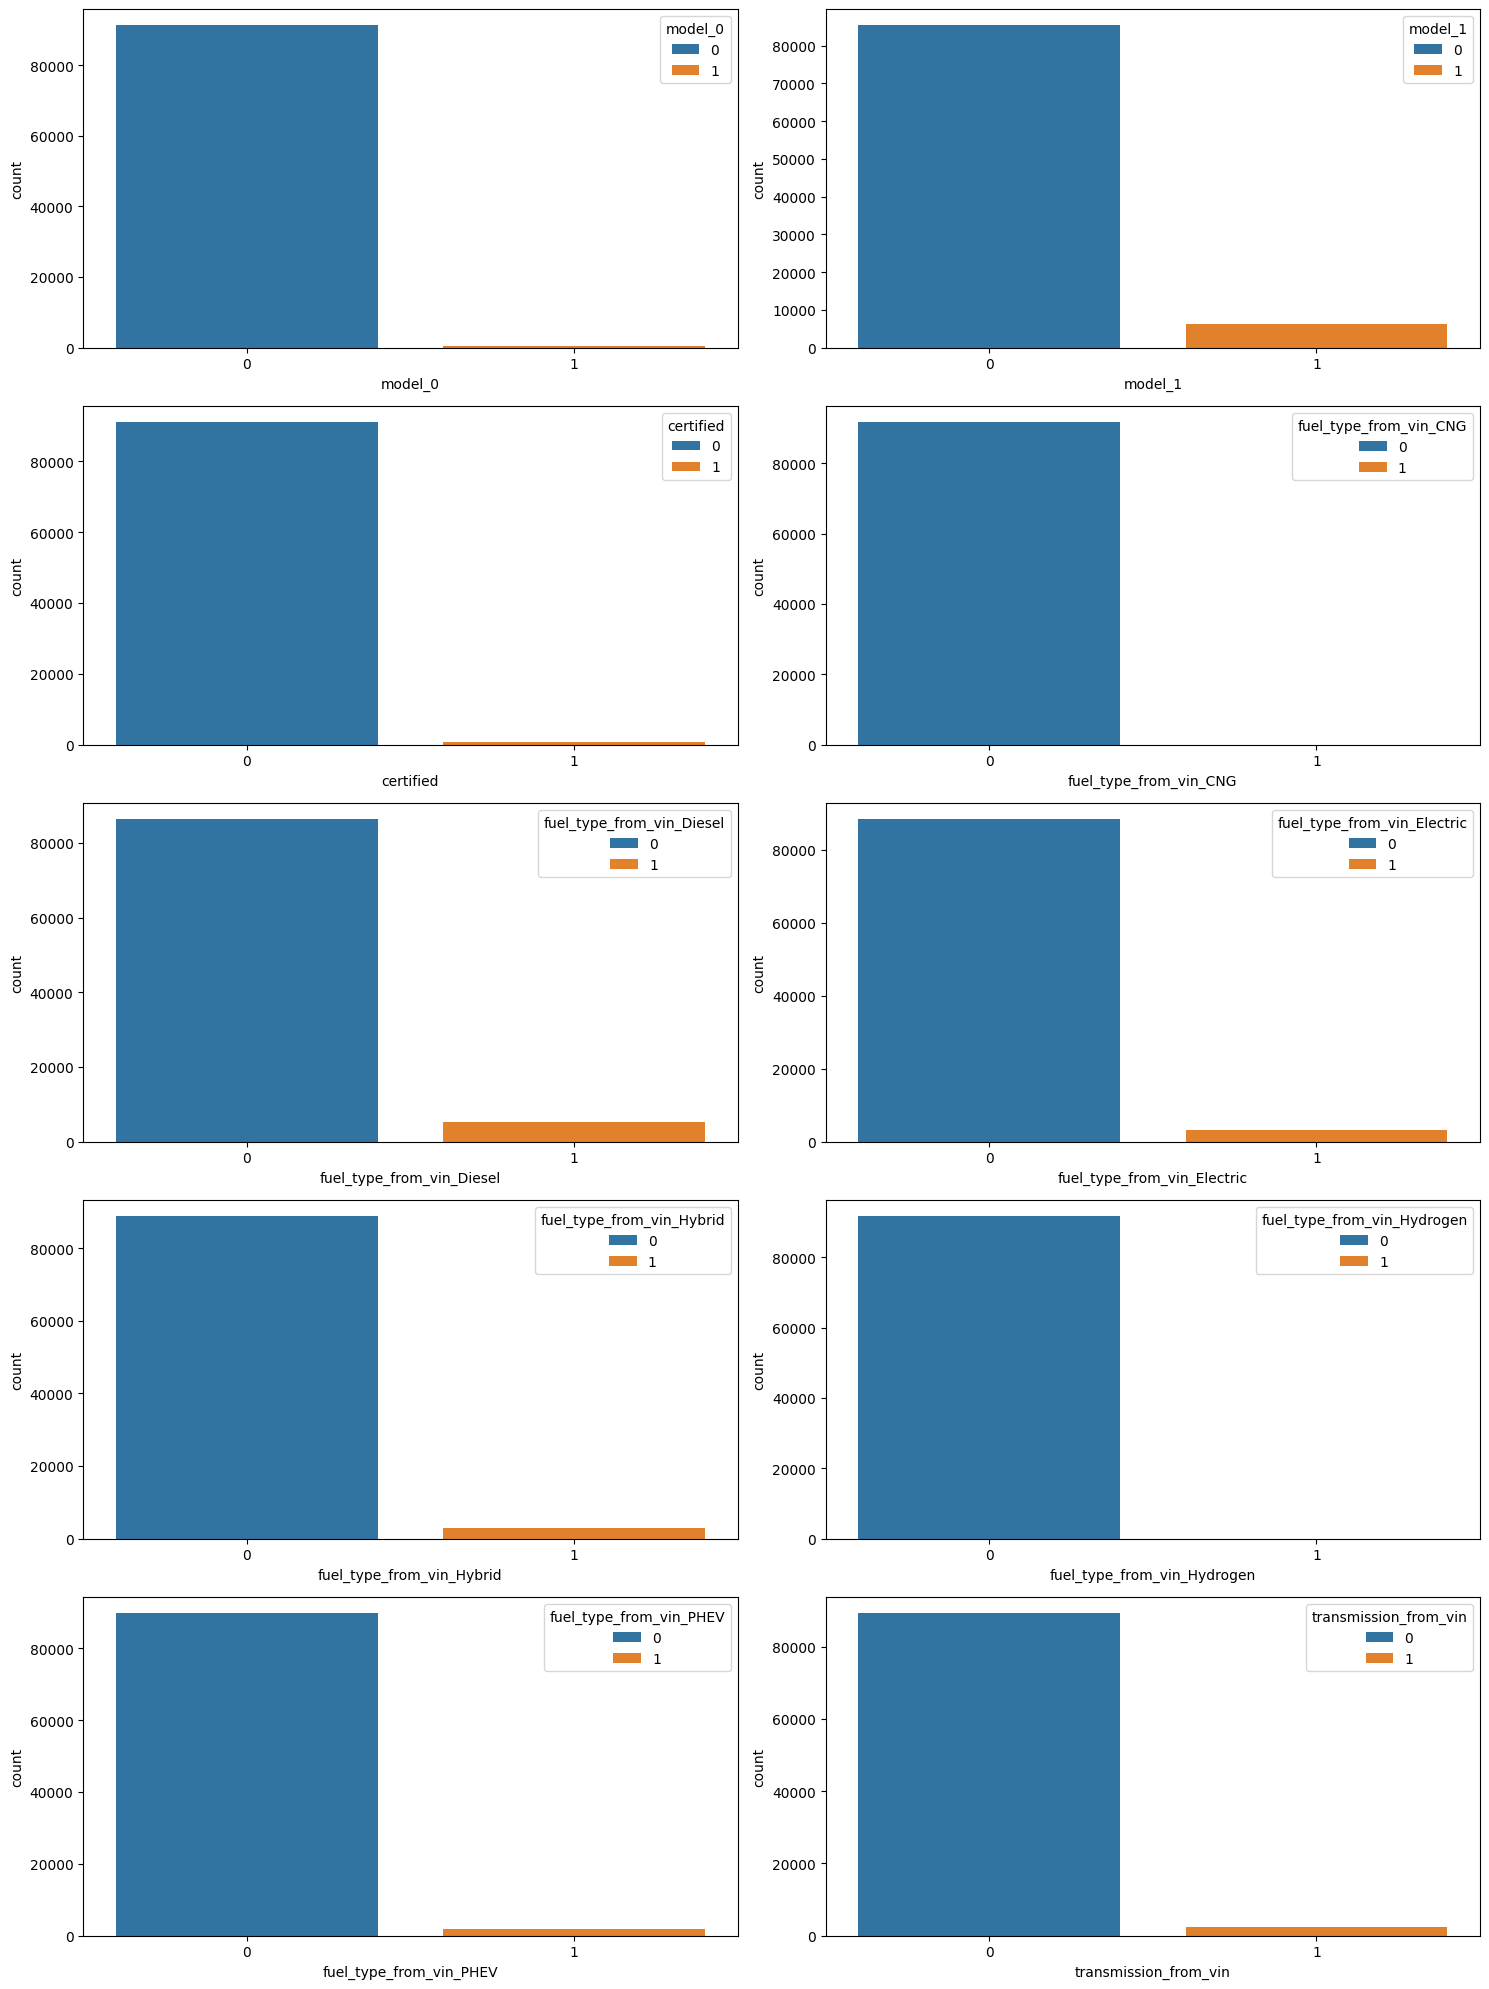

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create individual countplots for each column
fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # Adjust figsize as needed

sns.countplot(x='model_0', hue = 'model_0', data=X_train, ax=axes[0, 0])
sns.countplot(x='model_1', hue = 'model_1', data=X_train, ax=axes[0, 1])
sns.countplot(x='certified', hue = 'certified', data=X_train, ax=axes[1, 0])
sns.countplot(x='fuel_type_from_vin_CNG', hue = 'fuel_type_from_vin_CNG', data=X_train, ax=axes[1, 1])
sns.countplot(x='fuel_type_from_vin_Diesel', hue = 'fuel_type_from_vin_Diesel', data=X_train, ax=axes[2, 0])
sns.countplot(x='fuel_type_from_vin_Electric', hue = 'fuel_type_from_vin_Electric', data=X_train, ax=axes[2, 1])
sns.countplot(x='fuel_type_from_vin_Hybrid', hue = 'fuel_type_from_vin_Hybrid', data=X_train, ax=axes[3, 0])
sns.countplot(x='fuel_type_from_vin_Hydrogen', hue = 'fuel_type_from_vin_Hydrogen', data=X_train, ax=axes[3, 1])
sns.countplot(x='fuel_type_from_vin_PHEV', hue = 'fuel_type_from_vin_PHEV', data=X_train, ax=axes[4, 0])
sns.countplot(x='transmission_from_vin', hue = 'transmission_from_vin', data=y_train, ax=axes[4, 1])
# clear extra subplots to avoid empty plots
# axes[4, 1].axis('off')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

**Using SMOTE technique to handle imbalance in Train set**

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Select specific columns (features to balance)
selected_columns = ['model_0', 'model_1', 'certified', 'fuel_type_from_vin_CNG',
                    'fuel_type_from_vin_Diesel', 'fuel_type_from_vin_Electric',
                    'fuel_type_from_vin_Hybrid',
                    'fuel_type_from_vin_PHEV']
X = X_train[selected_columns]
y = y_train['transmission_from_vin']

# Initialize SMOTE with k_neighbors=1
smote = SMOTE(random_state=42, k_neighbors=1) # Changed k_neighbors to 1

# Create a copy of X to store resampled data
X_resampled = X.copy()

# Apply SMOTE to each selected feature
for feature in selected_columns:
    # Create a temporary target variable for the current feature
    temp_y = X[feature]

    # Check if the minority class has at least k_neighbors + 1 samples
    # If not, skip SMOTE for this feature
    unique_values, counts = np.unique(temp_y, return_counts=True)
    minority_class_count = counts.min()

    if minority_class_count > smote.k_neighbors:  # Check if minority class has enough samples
        # Apply SMOTE to the feature and temporary target
        X_feature_resampled, _ = smote.fit_resample(X, temp_y)

        # Update the resampled data with the balanced feature values
        X_resampled[feature] = X_feature_resampled[feature]
    else:
        print(f"Skipping SMOTE for feature '{feature}' due to insufficient minority class samples.")

# Apply SMOTE to balance the target variable
X_resampled, y_resampled = smote.fit_resample(X_resampled, y)


# Recombine with the remaining columns
X_train_resampled_combined = pd.concat([X_train.drop(columns=selected_columns), X_resampled], axis=1)

In [ ]:
print(X_train_resampled_combined.shape)
print(y_resampled.shape)

(178532, 30)
(178532,)


In [ ]:
#count the number of classes in each column of the Train set after handling imbalance
print(X_train_resampled_combined['model_0'].value_counts())
print(X_train_resampled_combined['model_1'].value_counts())
print(X_train_resampled_combined['certified'].value_counts())
print(X_train_resampled_combined['fuel_type_from_vin_CNG'].value_counts())
print(X_train_resampled_combined['fuel_type_from_vin_Diesel'].value_counts())
print(X_train_resampled_combined['fuel_type_from_vin_Electric'].value_counts())
print(X_train_resampled_combined['fuel_type_from_vin_Hybrid'].value_counts())
print(X_train_resampled_combined['fuel_type_from_vin_Hydrogen'].value_counts())
print(X_train_resampled_combined['fuel_type_from_vin_PHEV'].value_counts())
print(y_resampled.value_counts())

model_0
0    124570
1     53962
Name: count, dtype: int64
model_1
0    116391
1     62141
Name: count, dtype: int64
certified
0    123968
1     54564
Name: count, dtype: int64
fuel_type_from_vin_CNG
0    124965
1     53567
Name: count, dtype: int64
fuel_type_from_vin_Diesel
0    117560
1     60972
Name: count, dtype: int64
fuel_type_from_vin_Electric
0    120288
1     58244
Name: count, dtype: int64
fuel_type_from_vin_Hybrid
0    121069
1     57463
Name: count, dtype: int64
fuel_type_from_vin_Hydrogen
0.0    91680
1.0        1
Name: count, dtype: int64
fuel_type_from_vin_PHEV
0    122731
1     55801
Name: count, dtype: int64
transmission_from_vin
0    89266
1    89266
Name: count, dtype: int64


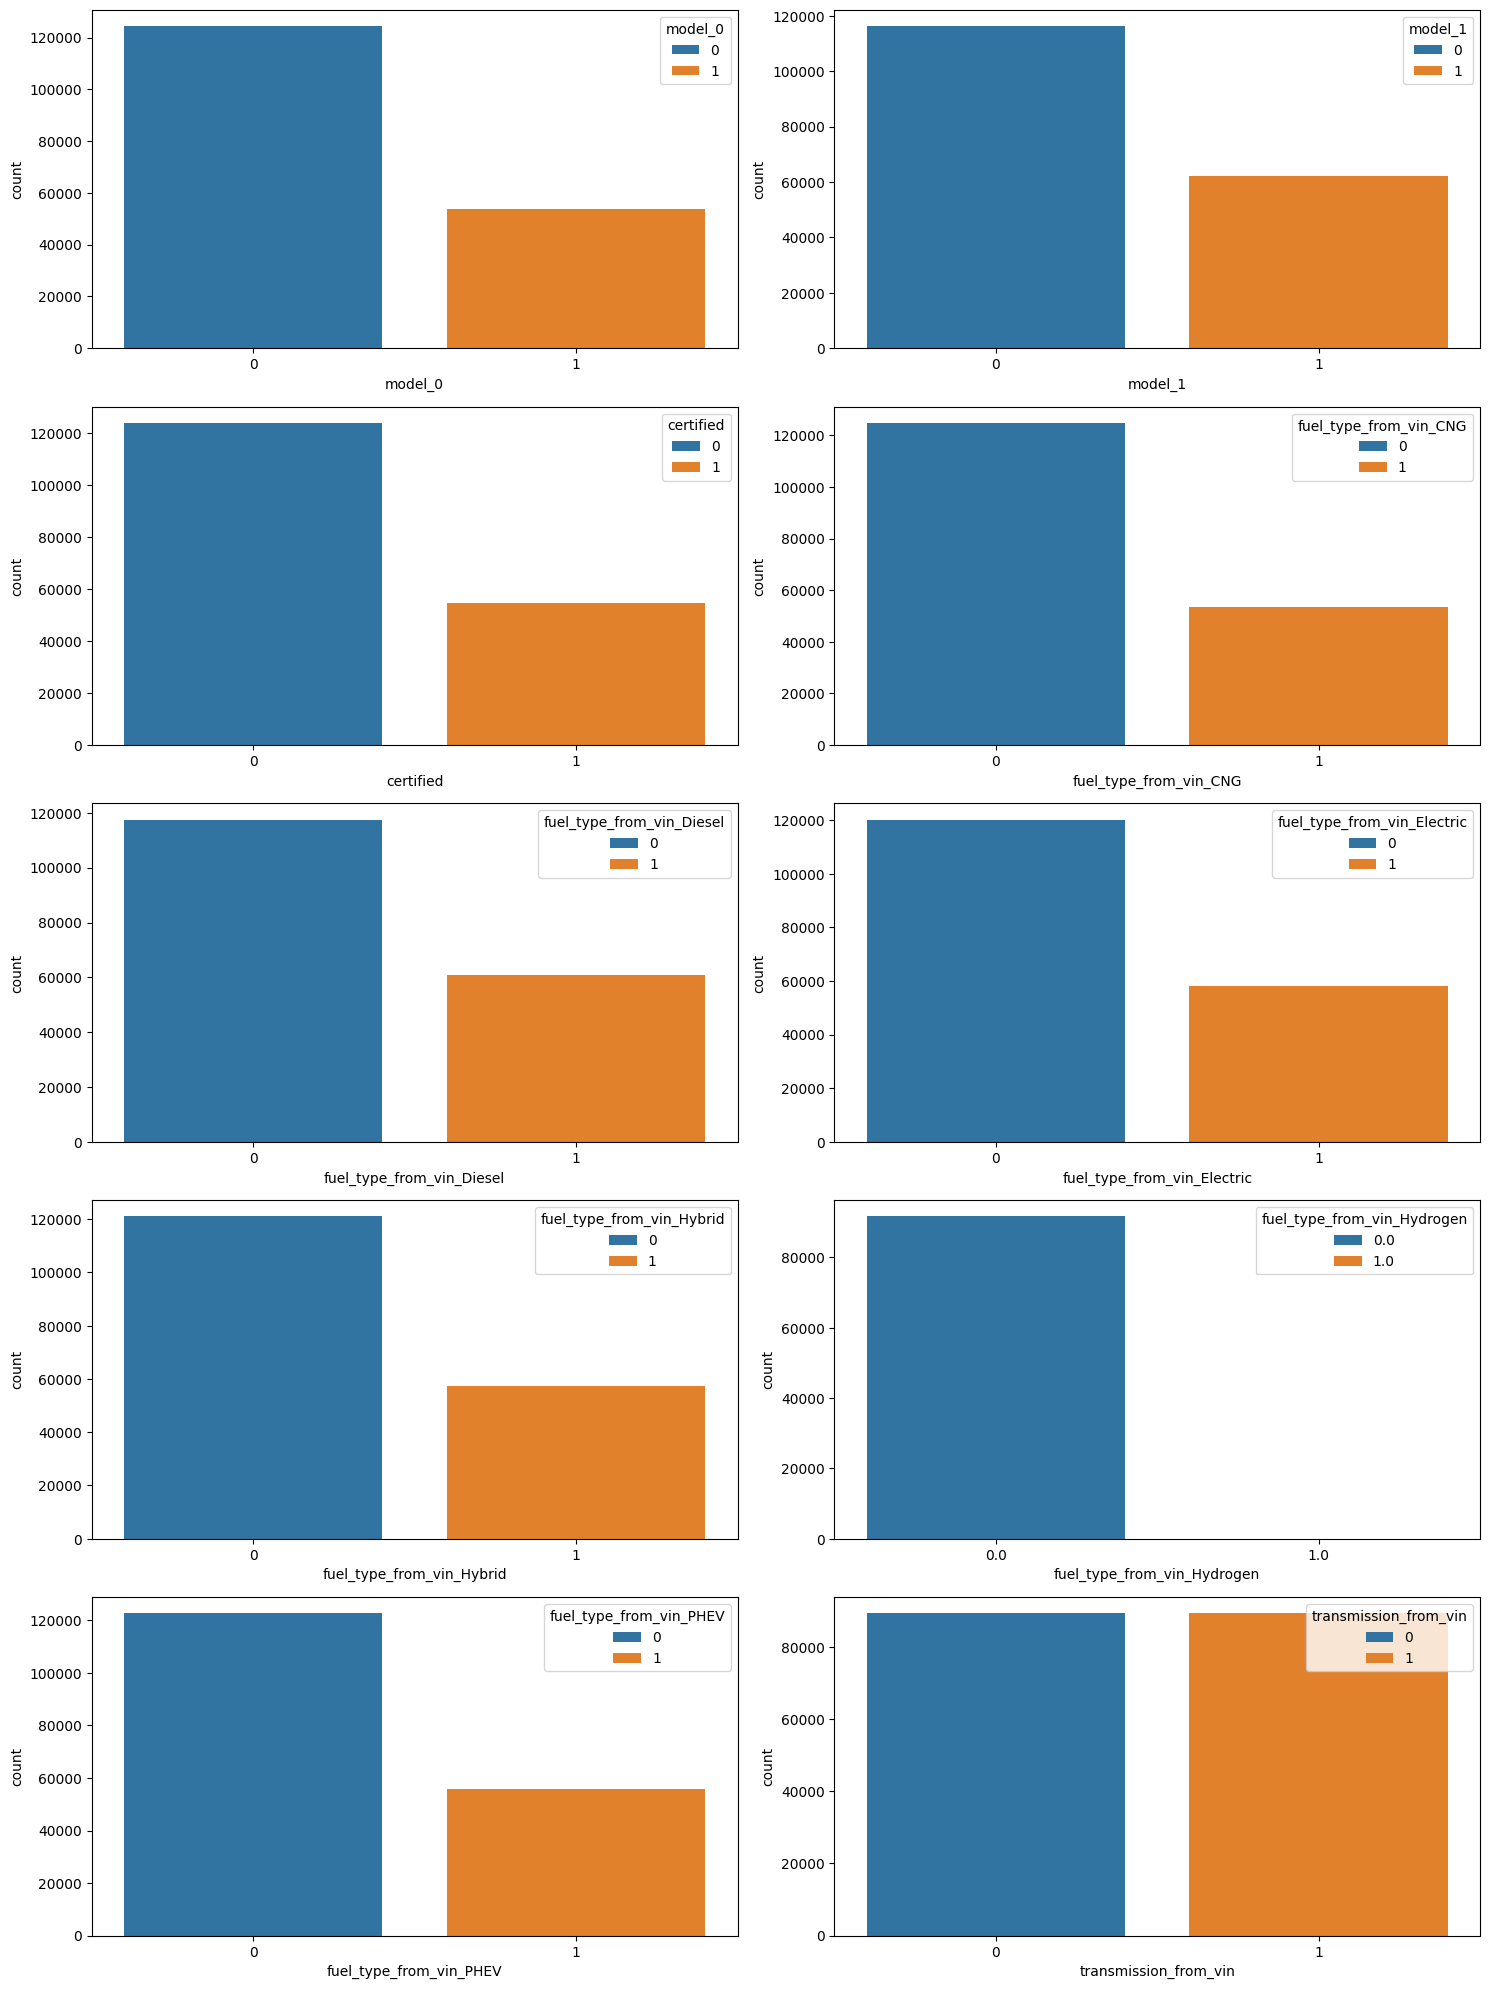

In [ ]:
# Create individual countplots for each column
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

sns.countplot(x='model_0', hue = 'model_0', data=X_train_resampled_combined, ax=axes[0, 0])
sns.countplot(x='model_1', hue = 'model_1', data=X_train_resampled_combined, ax=axes[0, 1])
sns.countplot(x='certified', hue = 'certified', data=X_train_resampled_combined, ax=axes[1, 0])
sns.countplot(x='fuel_type_from_vin_CNG', hue = 'fuel_type_from_vin_CNG', data=X_train_resampled_combined, ax=axes[1, 1])
sns.countplot(x='fuel_type_from_vin_Diesel', hue = 'fuel_type_from_vin_Diesel', data=X_train_resampled_combined, ax=axes[2, 0])
sns.countplot(x='fuel_type_from_vin_Electric', hue = 'fuel_type_from_vin_Electric', data=X_train_resampled_combined, ax=axes[2, 1])
sns.countplot(x='fuel_type_from_vin_Hybrid', hue = 'fuel_type_from_vin_Hybrid', data=X_train_resampled_combined, ax=axes[3, 0])
sns.countplot(x='fuel_type_from_vin_Hydrogen', hue = 'fuel_type_from_vin_Hydrogen', data=X_train_resampled_combined, ax=axes[3, 1])
sns.countplot(x='fuel_type_from_vin_PHEV', hue = 'fuel_type_from_vin_PHEV', data=X_train_resampled_combined, ax=axes[4, 0])
# Convert y_resampled to a DataFrame
y_resampled_df = y_resampled.to_frame()
sns.countplot(x='transmission_from_vin', hue = 'transmission_from_vin', data=y_resampled_df, ax=axes[4, 1])
# clear extra subplots to avoid empty plots
# axes[4, 1].axis('off')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

**Using SMOTE technique to handle imbalance in Test set**

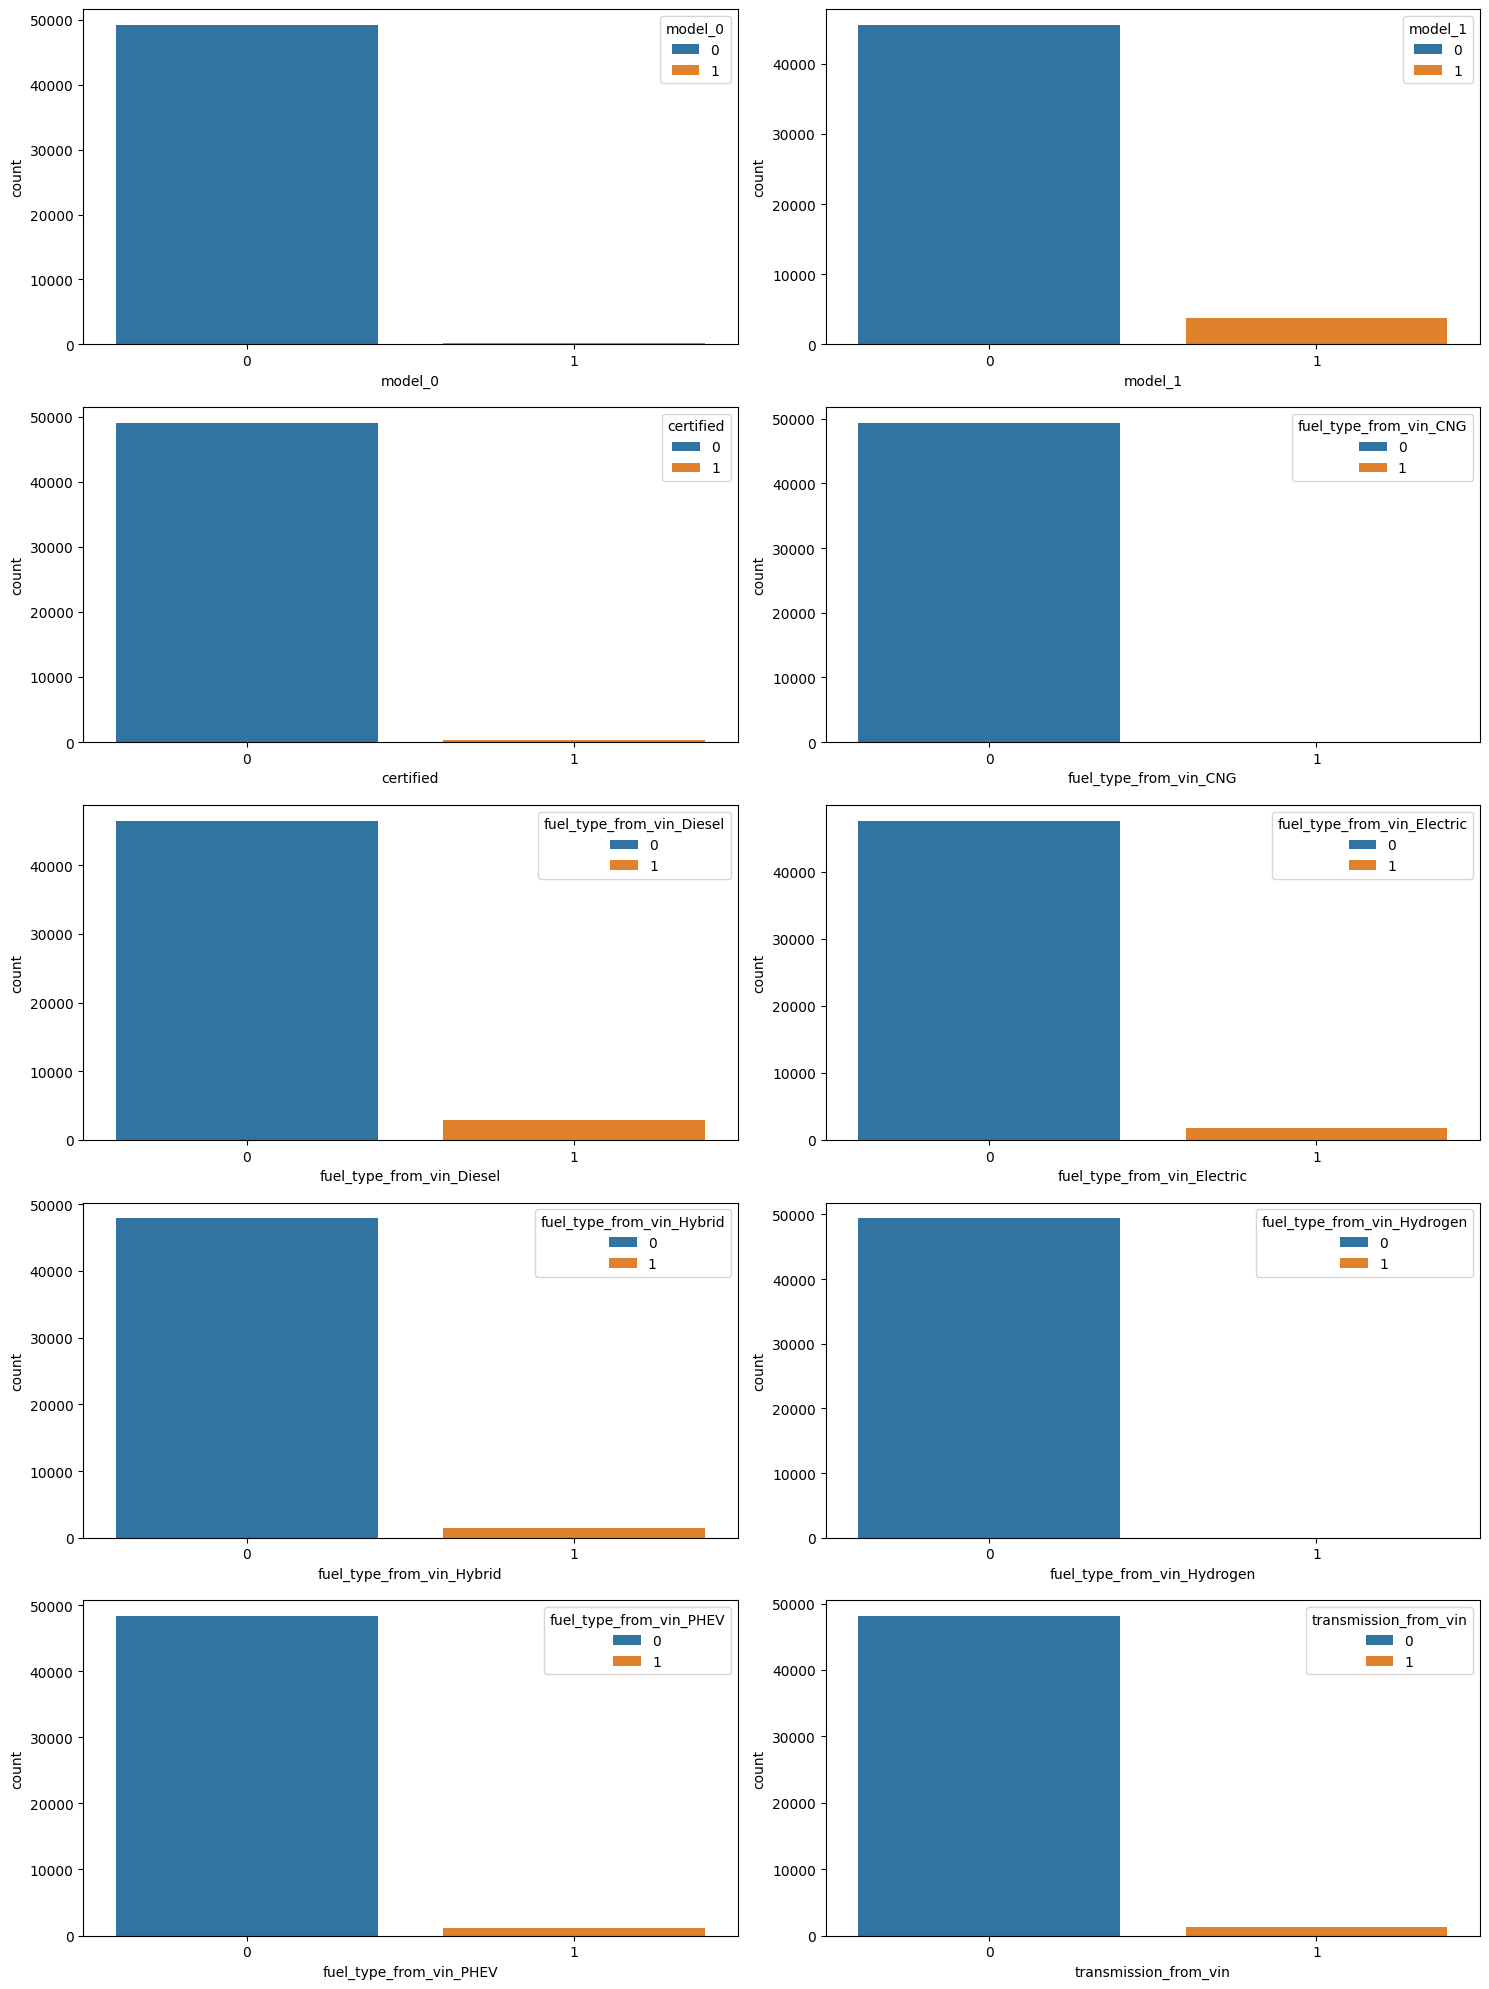

In [ ]:
# Create individual countplots for each column
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

sns.countplot(x='model_0', hue = 'model_0', data=X_test, ax=axes[0, 0])
sns.countplot(x='model_1', hue = 'model_1', data=X_test, ax=axes[0, 1])
sns.countplot(x='certified', hue = 'certified', data=X_test, ax=axes[1, 0])
sns.countplot(x='fuel_type_from_vin_CNG', hue = 'fuel_type_from_vin_CNG', data=X_test, ax=axes[1, 1])
sns.countplot(x='fuel_type_from_vin_Diesel', hue = 'fuel_type_from_vin_Diesel', data=X_test, ax=axes[2, 0])
sns.countplot(x='fuel_type_from_vin_Electric', hue = 'fuel_type_from_vin_Electric', data=X_test, ax=axes[2, 1])
sns.countplot(x='fuel_type_from_vin_Hybrid', hue = 'fuel_type_from_vin_Hybrid', data=X_test, ax=axes[3, 0])
sns.countplot(x='fuel_type_from_vin_Hydrogen', hue = 'fuel_type_from_vin_Hydrogen', data=X_test, ax=axes[3, 1])
sns.countplot(x='fuel_type_from_vin_PHEV', hue = 'fuel_type_from_vin_PHEV', data=X_test, ax=axes[4, 0])
sns.countplot(x='transmission_from_vin', hue = 'transmission_from_vin', data=y_test, ax=axes[4, 1])
# clear extra subplots to avoid empty plots
# axes[4, 1].axis('off')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Select specific columns (features to balance)
selected_columns = ['model_0', 'model_1', 'certified',
                    'fuel_type_from_vin_Diesel', 'fuel_type_from_vin_Electric',
                    'fuel_type_from_vin_Hybrid',
                    'fuel_type_from_vin_PHEV']
X1 = X_test[selected_columns]
y1 = y_test['transmission_from_vin']

# Initialize SMOTE with k_neighbors=1
smote = SMOTE(random_state=42, k_neighbors=1)

# Initialize Imputer to replace NaN with most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values in X1
X1_imputed = pd.DataFrame(imputer.fit_transform(X1), columns=X1.columns)

# Create a copy of X to store resampled data
X1_resampled = X1_imputed.copy()

# Apply SMOTE to each selected feature, but skip if insufficient minority samples
for feature in selected_columns:
    temp_y1 = X1_imputed[feature]
    unique_values, counts = np.unique(temp_y1, return_counts=True)
    minority_class_count = counts.min()

    if minority_class_count > smote.k_neighbors:
        X1_feature_resampled, _ = smote.fit_resample(X1_imputed, temp_y1)
        X1_resampled[feature] = X1_feature_resampled[feature]
    else:
        print(f"Skipping SMOTE for feature '{feature}' due to insufficient minority class samples.")

# Apply SMOTE to balance the target variable
X1_resampled, y1_resampled = smote.fit_resample(X1_resampled, y1)

X_test_remaining = X_test.drop(columns=selected_columns)
X_test_resampled_combined = pd.concat([X_test_remaining, X1_resampled], axis=1)

# If rows don't match, adjust X_test_resampled_combined
if X_test_resampled_combined.shape[0] != y1_resampled.shape[0]:
    num_rows_to_adjust = y1_resampled.shape[0] - X_test_resampled_combined.shape[0]

    if num_rows_to_adjust > 0:  # Need to add rows
        additional_rows = X_test_remaining.sample(n=num_rows_to_adjust, replace=True, random_state=42)
        X_test_remaining = pd.concat([X_test_remaining, additional_rows], ignore_index=True)
        X_test_resampled_combined = pd.concat([X_test_remaining, X1_resampled], axis=1)

    elif num_rows_to_adjust < 0:  # Need to remove rows
        # Remove extra rows from X_test_resampled_combined
        X_test_resampled_combined = X_test_resampled_combined.iloc[:y1_resampled.shape[0]]

print(f"Shape of X_test_resampled_combined: {X_test_resampled_combined.shape}")
print(f"Shape of y1_resampled: {y1_resampled.shape}")

Shape of X_test_resampled_combined: (96134, 30)
Shape of y1_resampled: (96134,)


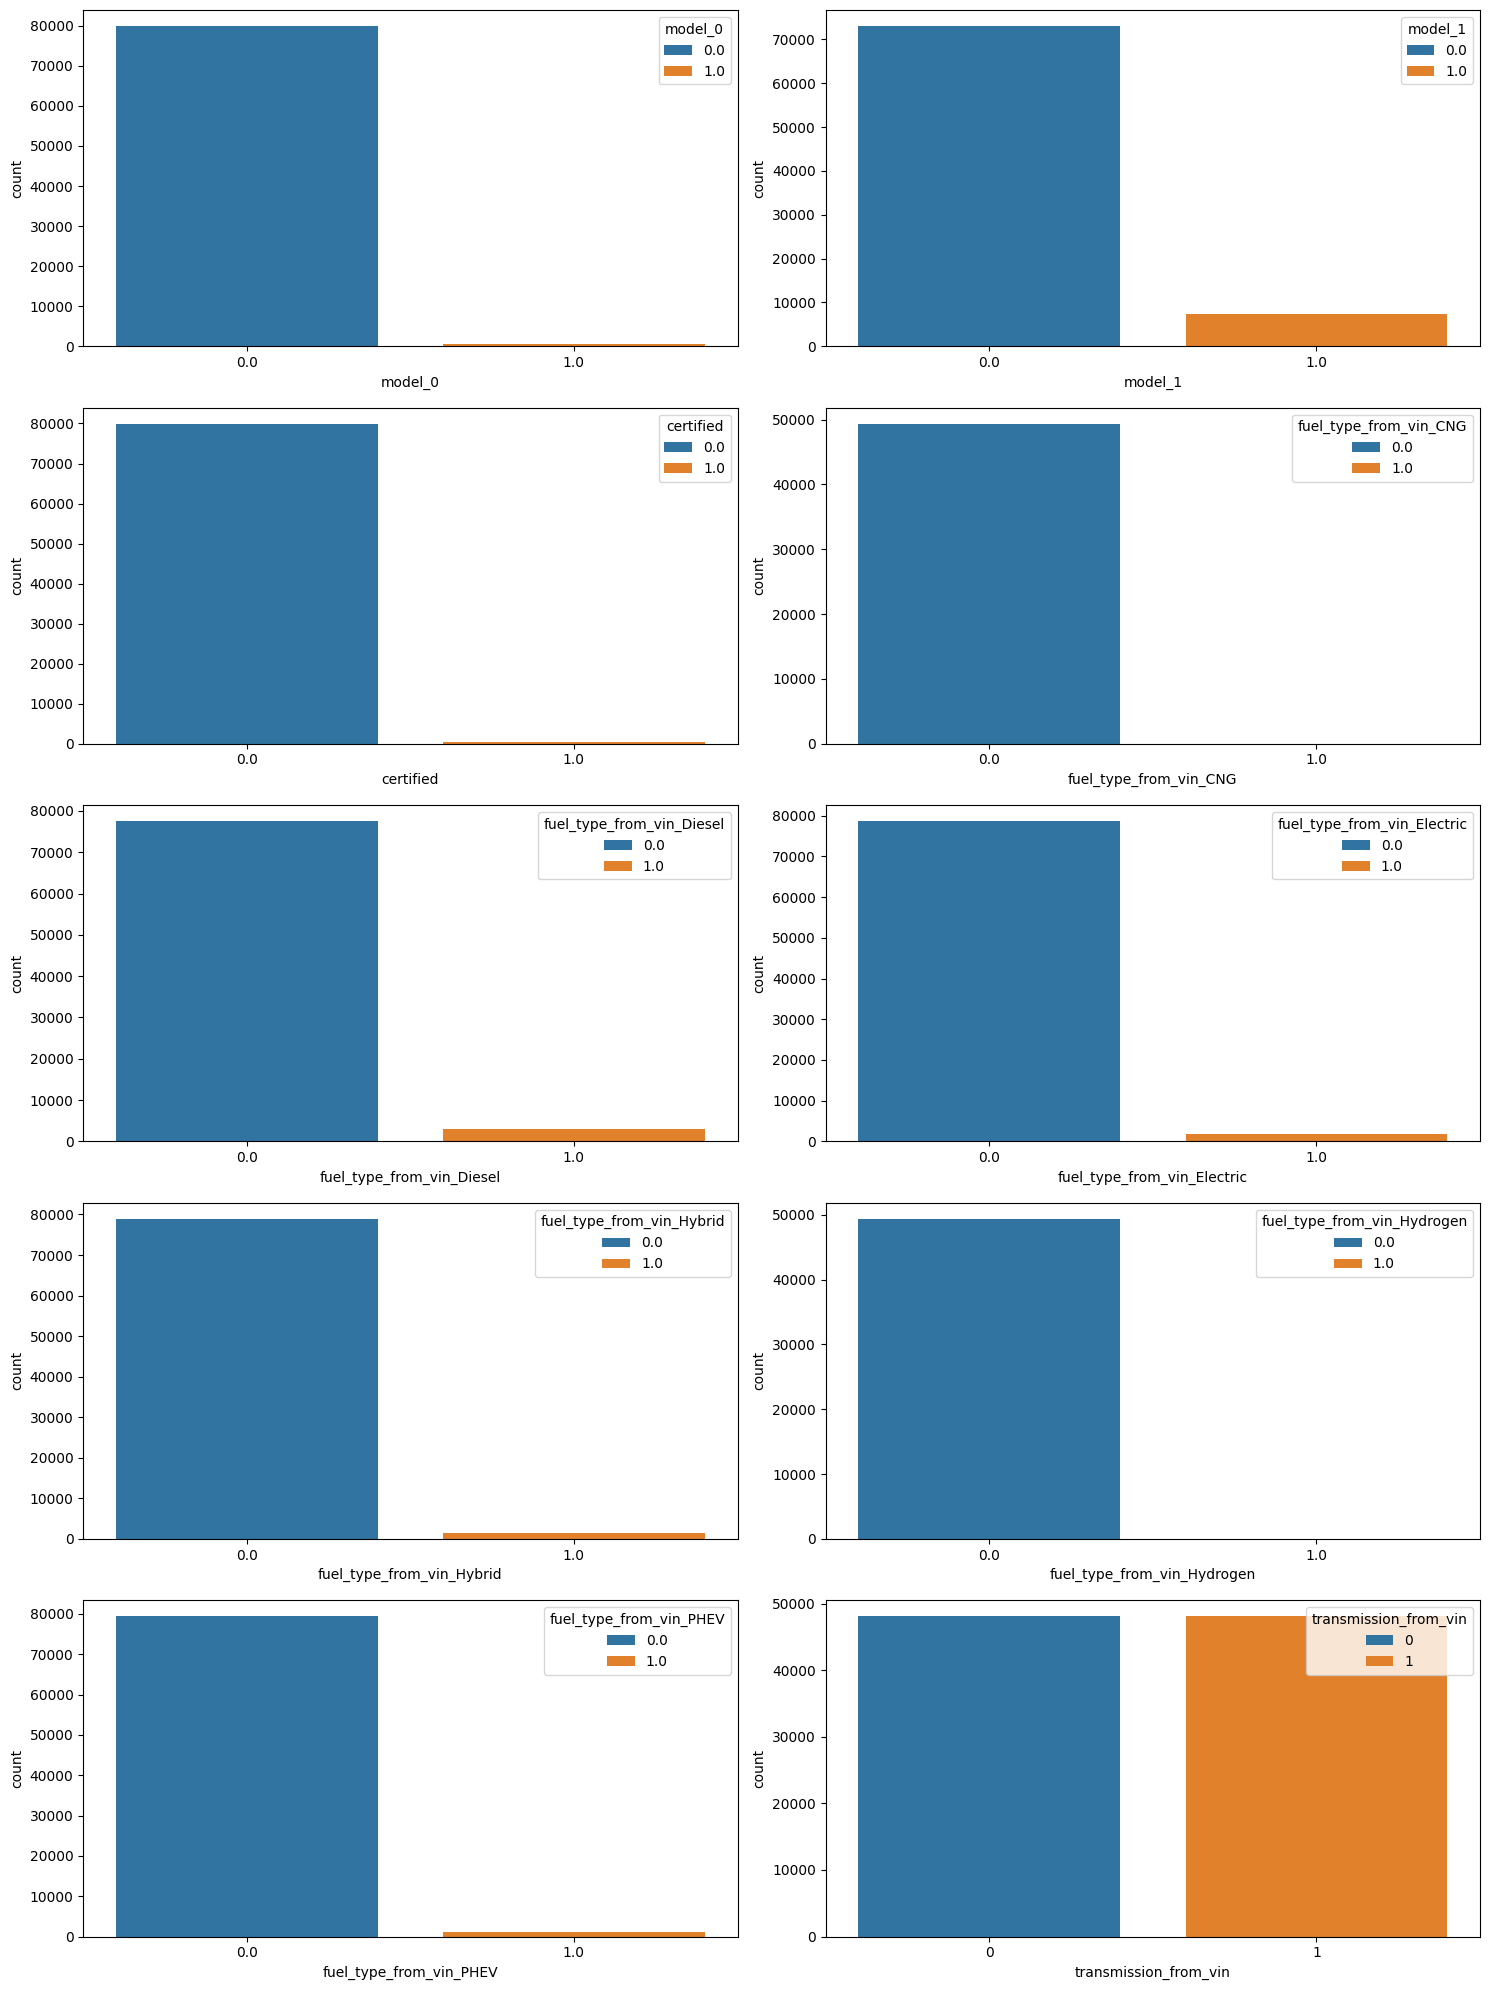

In [ ]:
# Create individual countplots for each column
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

sns.countplot(x='model_0', hue = 'model_0', data=X_test_resampled_combined, ax=axes[0, 0])
sns.countplot(x='model_1', hue = 'model_1', data=X_test_resampled_combined, ax=axes[0, 1])
sns.countplot(x='certified', hue = 'certified', data=X_test_resampled_combined, ax=axes[1, 0])
sns.countplot(x='fuel_type_from_vin_CNG', hue = 'fuel_type_from_vin_CNG', data=X_test_resampled_combined, ax=axes[1, 1])
sns.countplot(x='fuel_type_from_vin_Diesel', hue = 'fuel_type_from_vin_Diesel', data=X_test_resampled_combined, ax=axes[2, 0])
sns.countplot(x='fuel_type_from_vin_Electric', hue = 'fuel_type_from_vin_Electric', data=X_test_resampled_combined, ax=axes[2, 1])
sns.countplot(x='fuel_type_from_vin_Hybrid', hue = 'fuel_type_from_vin_Hybrid', data=X_test_resampled_combined, ax=axes[3, 0])
sns.countplot(x='fuel_type_from_vin_Hydrogen', hue = 'fuel_type_from_vin_Hydrogen', data=X_test_resampled_combined, ax=axes[3, 1])
sns.countplot(x='fuel_type_from_vin_PHEV', hue = 'fuel_type_from_vin_PHEV', data=X_test_resampled_combined, ax=axes[4, 0])

# Convert y1_resampled to a DataFrame before using it in sns.countplot
y1_resampled_df = y1_resampled.to_frame()

# Now use the DataFrame in sns.countplot
sns.countplot(x='transmission_from_vin', hue='transmission_from_vin', data=y1_resampled_df, ax=axes[4, 1])

# clear extra subplots to avoid empty plots
# axes[4, 1].axis('off')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
#count the number of classes in each column of the Train set after handling imbalance
print(X_test_resampled_combined['model_0'].value_counts())
print(X_test_resampled_combined['model_1'].value_counts())
print(X_test_resampled_combined['certified'].value_counts())
print(X_test_resampled_combined['fuel_type_from_vin_CNG'].value_counts())
print(X_test_resampled_combined['fuel_type_from_vin_Diesel'].value_counts())
print(X_test_resampled_combined['fuel_type_from_vin_Electric'].value_counts())
print(X_test_resampled_combined['fuel_type_from_vin_Hybrid'].value_counts())
print(X_test_resampled_combined['fuel_type_from_vin_Hydrogen'].value_counts())
print(X_test_resampled_combined['fuel_type_from_vin_PHEV'].value_counts())
print(y_resampled.value_counts())

model_0
0.0    79961
1.0      483
Name: count, dtype: int64
model_1
0.0    73053
1.0     7391
Name: count, dtype: int64
certified
0.0    79968
1.0      476
Name: count, dtype: int64
fuel_type_from_vin_CNG
0.0    49366
1.0        1
Name: count, dtype: int64
fuel_type_from_vin_Diesel
0.0    77511
1.0     2933
Name: count, dtype: int64
fuel_type_from_vin_Electric
0.0    78662
1.0     1782
Name: count, dtype: int64
fuel_type_from_vin_Hybrid
0.0    78925
1.0     1519
Name: count, dtype: int64
fuel_type_from_vin_Hydrogen
0.0    49365
1.0        2
Name: count, dtype: int64
fuel_type_from_vin_PHEV
0.0    79368
1.0     1076
Name: count, dtype: int64
transmission_from_vin
0    89266
1    89266
Name: count, dtype: int64


## **7. Scaling Test and Train Sets**
### The purpose of scaling is to bring all features (variables) into a common range or distribution. This can improve the performance and convergence speed of machine learning algorithms

### **Scaling X_train**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler with desired range (default is 0 to 1)
scaler = MinMaxScaler()

# Fit and transform the data
scaled_X_train_resampled_combined = scaler.fit_transform(X_train_resampled_combined)

# Convert the result back to a DataFrame
scaled_X_train_resampled_combined = pd.DataFrame(scaled_X_train_resampled_combined, columns=X_train_resampled_combined.columns)

print("Scaled Data:")
scaled_X_train_resampled_combined.head()


Scaled Data:


,model_year,make_0,make_1,make_2,make_3,make_4,make_5,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,mileage,price,number_price_changes,stock_type,dealer_type,fuel_type_from_vin_Gas,fuel_type_from_vin_Hydrogen,model_0,model_1,certified,fuel_type_from_vin_CNG,fuel_type_from_vin_Diesel,fuel_type_from_vin_Electric,fuel_type_from_vin_Hybrid,fuel_type_from_vin_PHEV
0,0.972222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000719,0.005834,0.006494,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.833333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.532174,0.002697,0.051948,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000055,0.003610,0.045455,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000050,0.002961,0.012987,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.861111,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.361057,0.002520,0.025974,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Scaling X_test**

In [ ]:
# Initialize MinMaxScaler with desired range (default is 0 to 1)
scaler2 = MinMaxScaler()

# Fit and transform the data
scaled_X_test_resampled_combined = scaler2.fit_transform(X_test_resampled_combined)

# Get column names from the original DataFrame
#columns = X_test.columns

# Convert the result back to a DataFrame using the original column names
scaled_X_test_resampled_combined = pd.DataFrame(scaled_X_test_resampled_combined, columns=X_test_resampled_combined.columns)

print("Scaled Data:")
scaled_X_test_resampled_combined.head()

Scaled Data:


,model_year,make_0,make_1,make_2,make_3,make_4,make_5,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,mileage,price,number_price_changes,stock_type,dealer_type,fuel_type_from_vin_CNG,fuel_type_from_vin_Gas,fuel_type_from_vin_Hydrogen,model_0,model_1,certified,fuel_type_from_vin_Diesel,fuel_type_from_vin_Electric,fuel_type_from_vin_Hybrid,fuel_type_from_vin_PHEV
0,0.828571,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.454387,0.003372,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.800000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.359515,0.002005,0.021583,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000030,0.010527,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.971429,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.245099,0.005853,0.014388,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.885714,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.438049,0.002976,0.007194,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# scaling y1_resampled_df
scaler3 = MinMaxScaler()

# Fit and transform the data
scaled_y1_resampled_df = scaler3.fit_transform(y1_resampled_df)


In [ ]:
# scaling y1_resampled_df
scaler4 = MinMaxScaler()

# Fit and transform the data
scaled_y_resampled_df = scaler4.fit_transform(y_resampled_df)

In [ ]:
print(scaled_X_train_resampled_combined.shape)
print(scaled_X_test_resampled_combined.shape)

(178532, 30)
(96134, 30)


In [ ]:
#print(scaled_y_resampled.shape)
print(scaled_y1_resampled_df.shape)

(96134, 1)


In [ ]:
print(y_resampled.shape) # train
print(y1_resampled.shape) # test

(178532,)
(96134,)


## **Model Building**

In [ ]:
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer # Import the SimpleImputer class from the correct module
from sklearn.pipeline import Pipeline  # Import Pipeline for creating the pipeline

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver ='lbfgs',multi_class='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DTR', DecisionTreeClassifier()))
models.append(('XGB',XGBClassifier()))

In [ ]:
results = []
names = []

In [ ]:
# Import necessary classes
from sklearn.model_selection import KFold, cross_val_score

# Define the models to evaluate
models = [('Logistic Regression', LogisticRegression(solver='lbfgs', multi_class='auto')),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGB', XGBClassifier())
]

# Define the number of folds for k-fold cross-validation
num_folds = 5
results = []
names = []

# Iterate through the models
for name, model in models:
    # Create a KFold object
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Handle NaN values before cross-validation
    # This ensures that any NaN values are filled for each fold
    imputer = SimpleImputer(strategy='constant', fill_value=0) # Use an imputer to handle NaNs
    pipeline = Pipeline([('imputer', imputer), ('model', model)]) # Create a pipeline with imputation and model

    # Perform cross-validation using the pipeline
    cv_results = cross_val_score(pipeline, scaled_X_train_resampled_combined, y_resampled, cv=kfold, scoring='accuracy')

    # Store the results
    results.append(cv_results)
    names.append(name)

    # Print the mean and standard deviation of the accuracy scores
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Logistic Regression: 0.9857 (0.0006)
K-Nearest Neighbors: 0.9873 (0.0003)
Naive Bayes: 0.9865 (0.0004)
Support Vector Machine: 0.9877 (0.0006)
Random Forest: 0.9897 (0.0007)
Decision Tree: 0.9873 (0.0004)
XGB: 0.9897 (0.0005)


### **Hyperparameter Tuning**
Since RandomForestClassifier is the best performing model based on the cross-validation results, we will be be performimg hyperparameter tuning to identify the best hyperparameter for prediction.

In [ ]:
# hyper parameter tuning of random forest regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error


In [ ]:
#Instantiating
RF = RandomForestClassifier()

# Default parameters
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],

}

In [ ]:
# Create a Random Forest Regressor
rf_regressor = RandomForestClassifier()


# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor,
                           param_grid=param_grid, cv=3,
                           scoring='accuracy',
                           n_jobs=-1, verbose=2 )

In [ ]:
# Fit the GridSearchCV object to the training data
grid_search.fit(scaled_X_train_resampled_combined, y_resampled)

#Use the best estimator from grid search
best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 144 candidates, totalling 432 fits


In [ ]:
best_rf

In [ ]:
# Get the feature names from the training data
training_feature_names = scaled_X_train_resampled_combined.columns

# Ensure the test data has the same feature names and order
scaled_X_test_resampled_combined = scaled_X_test_resampled_combined[training_feature_names]

# Now, make predictions
y_pred = best_rf.predict(scaled_X_test_resampled_combined)

### **Evaluating Model Performance**

In [ ]:
# Evaluate the performance of the best model on the test dataset
accuracy = accuracy_score(scaled_y1_resampled_df, y_pred)
print(f"Accuracy of the best model on the test dataset: {accuracy:.4f}")

In [ ]:
# Evaluate the performance of the best model on the test dataset
accuracy = accuracy_score(y1_resampled, y_pred)  # Changed from scaled_y1_resampled_df to y1_resampled
print(f"Accuracy of the best model on the test dataset: {accuracy:.4f}")

In [ ]:
# Generate classification report and confusion matrix
print(classification_report(scaled_y1_resampled_df, y_pred))
cm = confusion_matrix(scaled_y1_resampled_df, y_pred)
print("Confusion Matrix:")
print(cm)

In [ ]:
# You can also visualize the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Exporting Model Predictions to CSV**

In [ ]:
# Create a DataFrame
model_df = pd.DataFrame({
    'Predictions': y_pred
})

# Save to CSV
model_df.to_csv('predictions.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Example: Assume you have the following variables:
# X_train, y_train - Your feature matrix and target labels
# X_test, y_test - Your test feature matrix and target labels

# Train a model (for example, a RandomForestClassifier)
model = RandomForestClassifier(random_state=42)
model.fit(scaled_X_train_resampled_combined, scaled_y_resampled_df)

# Predict probabilities (for ROC curve, we need probabilities, not just predictions)
y_pred_prob = model.predict_proba(scaled_X_test_resampled_combined)[:, 1]  # Get the probability for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(scaled_y1_resampled_df, y_pred_prob)

# Compute AUC score
auc_score = roc_auc_score(scaled_y1_resampled_df, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import pickle

# Replace these with your actual model, features, and predictions
model = ...  # Trained machine learning model
encoded_features = ...  # Pandas DataFrame containing encoded features
predictions = ...  # Predictions as a pandas Series or numpy array

# File paths
model_pkl_path = "model.pkl"
features_csv_path = "encoded_features.csv"
predictions_csv_path = "predictions.csv"

# Save the model as a pickle file
with open(model_pkl_path, "wb") as f:
    pickle.dump(model, f)
print(f"Model saved to {model_pkl_path}")

# Save the encoded features to a CSV file
encoded_features.to_csv(features_csv_path, index=False)
print(f"Encoded features saved to {features_csv_path}")

# Save the predictions to a CSV file
predictions_df = pd.DataFrame(predictions, columns=["Prediction"])
predictions_df.to_csv(predictions_csv_path, index=False)
print(f"Predictions saved to {predictions_csv_path}")


#                           **THE END**